In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings(action='ignore')

In [184]:
data2 = pd.read_csv("/content/drive/MyDrive/Data Mining Project/cox-violent-parsed.csv")

Data Set 2

In [185]:
data2.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,1.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,0,1,0,0,0,-1.0,13/08/2013 6:03,14/08/2013 5:41,13011352CF10A,13/08/2013,NaN,1.0,(F3),Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,0,327,0
1,2.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,0,1,0,0,0,-1.0,13/08/2013 6:03,14/08/2013 5:41,13011352CF10A,13/08/2013,NaN,1.0,(F3),Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,334,961,0
2,3.0,michael ryan,michael,ryan,31/12/2014,Male,06/02/1985,31,25 - 45,Caucasian,0,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,31/12/2014,30/12/2014,03/01/2015,0,3,457,0
3,4.0,kevon dixon,kevon,dixon,27/01/2013,Male,22/01/1982,34,25 - 45,African-American,0,3,0,0,0,-1.0,26/01/2013 3:45,05/02/2013 5:36,13001275CF10A,26/01/2013,NaN,1.0,(F3),Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,05/07/2013,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),05/07/2013,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,27/01/2013,26/01/2013,05/02/2013,0,9,159,1
4,5.0,ed philo,ed,philo,14/04/2013,Male,14/05/1991,24,Less than 25,African-American,0,4,0,1,4,-1.0,13/04/2013 4:58,14/04/2013 7:02,13005330CF10A,13/04/2013,NaN,1.0,(F3),Possession of Cocaine,1,13011511MM10A,(M1),0.0,16/06/2013,Driving Under The Influence,16/06/2013,16/06/2013,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,14/04/2013,16/06/2013,16/06/2013,4,0,63,0


In [186]:
type(data2["compas_screening_date"])

pandas.core.series.Series

In [187]:
data2["score_text"]

0           Low
1           Low
2        Medium
3           Low
4           Low
          ...  
18311    Medium
18312       Low
18313       Low
18314       Low
18315       Low
Name: score_text, Length: 18316, dtype: object

In [188]:
data2.describe()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event
count,11001.00000,18316.000000,18316.000000,18316.000000,18316.000000,18316.000000,18316.000000,17019.000000,17449.000000,18316.000000,6359.000000,0.0,18316.000000,18316.000000,18316.000000,18316.000000,18316.000000,18316.000000,18316.000000
mean,5501.00000,34.019273,0.076873,4.997052,0.098439,0.124263,3.913191,4.302485,57.694596,0.414774,19.961629,NaN,0.073105,4.997052,4.022822,3.913191,186.394901,625.210636,0.044715
std,3175.85949,11.667811,0.464272,2.937569,0.517639,0.524537,5.299864,81.159881,317.994694,0.576449,74.139695,NaN,0.260317,2.937569,2.614189,5.299864,283.373004,335.881439,0.206683
min,1.00000,18.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-597.000000,0.000000,-1.000000,-1.000000,NaN,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,2751.00000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,2.000000,2.000000,0.000000,0.000000,364.000000,0.000000
50%,5501.00000,31.000000,0.000000,5.000000,0.000000,0.000000,2.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,5.000000,4.000000,2.000000,7.000000,634.000000,0.000000
75%,8251.00000,41.000000,0.000000,8.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,8.000000,6.000000,5.000000,309.000000,897.000000,0.000000
max,11001.00000,96.000000,20.000000,10.000000,13.000000,17.000000,43.000000,1057.000000,9485.000000,1.000000,993.000000,NaN,1.000000,10.000000,10.000000,43.000000,1197.000000,1187.000000,1.000000


In [189]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       11001 non-null  float64
 1   name                     18316 non-null  object 
 2   first                    18316 non-null  object 
 3   last                     18316 non-null  object 
 4   compas_screening_date    18316 non-null  object 
 5   sex                      18316 non-null  object 
 6   dob                      18316 non-null  object 
 7   age                      18316 non-null  int64  
 8   age_cat                  18316 non-null  object 
 9   race                     18316 non-null  object 
 10  juv_fel_count            18316 non-null  int64  
 11  decile_score             18316 non-null  int64  
 12  juv_misd_count           18316 non-null  int64  
 13  juv_other_count          18316 non-null  int64  
 14  priors_count          

**Data Preprocessing and Cleaning**

*Feature Selection*

In [190]:
data2 = data2.drop(['compas_screening_date','id','name','first','last','dob','screening_date','start','end','priors_count.1','event','c_case_number','v_screening_date','c_offense_date','in_custody','out_custody','c_jail_in','c_jail_out','c_days_from_compas','days_b_screening_arrest','c_arrest_date','violent_recid','vr_case_number','vr_charge_degree','vr_offense_date','vr_charge_desc','r_case_number','r_charge_degree','r_days_from_arrest','r_offense_date','r_charge_desc','r_jail_in','r_jail_out'], axis=1)

In [191]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   sex                   18316 non-null  object
 1   age                   18316 non-null  int64 
 2   age_cat               18316 non-null  object
 3   race                  18316 non-null  object
 4   juv_fel_count         18316 non-null  int64 
 5   decile_score          18316 non-null  int64 
 6   juv_misd_count        18316 non-null  int64 
 7   juv_other_count       18316 non-null  int64 
 8   priors_count          18316 non-null  int64 
 9   c_charge_degree       17449 non-null  object
 10  c_charge_desc         17435 non-null  object
 11  is_recid              18316 non-null  int64 
 12  is_violent_recid      18316 non-null  int64 
 13  type_of_assessment    18316 non-null  object
 14  decile_score.1        18316 non-null  int64 
 15  score_text            18293 non-null

*Handling Missing Data*

In [192]:
data2.isnull().sum()

sex                       0
age                       0
age_cat                   0
race                      0
juv_fel_count             0
decile_score              0
juv_misd_count            0
juv_other_count           0
priors_count              0
c_charge_degree         867
c_charge_desc           881
is_recid                  0
is_violent_recid          0
type_of_assessment        0
decile_score.1            0
score_text               23
v_type_of_assessment      0
v_decile_score            0
v_score_text              6
dtype: int64

In [193]:
data2.dropna(inplace=True)

In [194]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17418 entries, 0 to 18315
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   sex                   17418 non-null  object
 1   age                   17418 non-null  int64 
 2   age_cat               17418 non-null  object
 3   race                  17418 non-null  object
 4   juv_fel_count         17418 non-null  int64 
 5   decile_score          17418 non-null  int64 
 6   juv_misd_count        17418 non-null  int64 
 7   juv_other_count       17418 non-null  int64 
 8   priors_count          17418 non-null  int64 
 9   c_charge_degree       17418 non-null  object
 10  c_charge_desc         17418 non-null  object
 11  is_recid              17418 non-null  int64 
 12  is_violent_recid      17418 non-null  int64 
 13  type_of_assessment    17418 non-null  object
 14  decile_score.1        17418 non-null  int64 
 15  score_text            17418 non-null

In [195]:
#Feature extraction

data2['juv_fel_seriousness'] = data2['juv_fel_count'] - data2['juv_misd_count']
data2.drop(columns=['juv_fel_count', 'juv_misd_count','juv_other_count'], inplace=True)

In [196]:
#Storing output variables in a seperate column

output = data2[['is_recid', 'is_violent_recid']]
data2.drop(columns=['is_recid', 'is_violent_recid'], inplace=True)
data2 = pd.concat([data2, output], axis=1)

*Column Names*

In [197]:
data2.rename(columns={'priors_count': 'n_punished'}, inplace=True)
data2.rename(columns={'c_charge_desc':'act(accusation)'}, inplace=True)
data2.rename(columns={'decile_score.1':'decile_score_min'}, inplace=True)
data2.rename(columns={'score_text':'risk_score'}, inplace=True)
data2.rename(columns={'v_type_of_assessment':'m_type_assessment'}, inplace=True)
data2.rename(columns={'v_decile_score':'m_decile_score'}, inplace=True)
data2.rename(columns={'v_score_text':'m_risk_score'}, inplace=True)

In [198]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17418 entries, 0 to 18315
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   sex                  17418 non-null  object
 1   age                  17418 non-null  int64 
 2   age_cat              17418 non-null  object
 3   race                 17418 non-null  object
 4   decile_score         17418 non-null  int64 
 5   n_punished           17418 non-null  int64 
 6   c_charge_degree      17418 non-null  object
 7   act(accusation)      17418 non-null  object
 8   type_of_assessment   17418 non-null  object
 9   decile_score_min     17418 non-null  int64 
 10  risk_score           17418 non-null  object
 11  m_type_assessment    17418 non-null  object
 12  m_decile_score       17418 non-null  int64 
 13  m_risk_score         17418 non-null  object
 14  juv_fel_seriousness  17418 non-null  int64 
 15  is_recid             17418 non-null  int64 
 16  is_v

In [199]:
data2["sex"].value_counts()

Male      14228
Female     3190
Name: sex, dtype: int64

In [200]:
data2["age_cat"].value_counts()

25 - 45            9929
Less than 25       4060
Greater than 45    3429
Name: age_cat, dtype: int64

In [201]:
data2["race"].value_counts()

African-American    9387
Caucasian           5748
Hispanic            1347
Other                823
Asian                 64
Native American       49
Name: race, dtype: int64

In [202]:
data2["c_charge_degree"].value_counts()

(F3)     10270
(M1)      3676
(F2)      1503
(M2)      1283
(F1)       297
(F7)       184
(MO3)      154
(NI0)       15
(F6)        15
(F5)        13
(CO3)        6
(CT)         1
(TCX)        1
Name: c_charge_degree, dtype: int64

In [203]:
data2["act(accusation)"].value_counts()

arrest case no charge             3084
Battery                           2181
Possession of Cocaine             1431
Grand Theft in the 3rd Degree     1191
Driving While License Revoked      484
                                  ... 
Interfere W/Traf Cont Dev RR         1
Simulation of Legal Process          1
Murder in 2nd Degree                 1
Fail Sex Offend Report Bylaw         1
Lewd/Lasciv Molest Elder Persn       1
Name: act(accusation), Length: 513, dtype: int64

In [204]:
data2["type_of_assessment"].value_counts()

Risk of Recidivism    17418
Name: type_of_assessment, dtype: int64

In [205]:
data2["risk_score"].value_counts()

Low       8075
Medium    4886
High      4457
Name: risk_score, dtype: int64

In [206]:
data2["m_type_assessment"].value_counts()

Risk of Violence    17418
Name: m_type_assessment, dtype: int64

In [207]:
data2["m_risk_score"].value_counts()

Low       10549
Medium     4574
High       2295
Name: m_risk_score, dtype: int64

*The columns "type_of_assessment" and "m_type_assessment" have only one kind of value, so it is better to remove those columns as they do not contribute to any decison making*

In [208]:
data2.drop(columns=["type_of_assessment","m_type_assessment"], inplace=True)

**Analysis of Data**

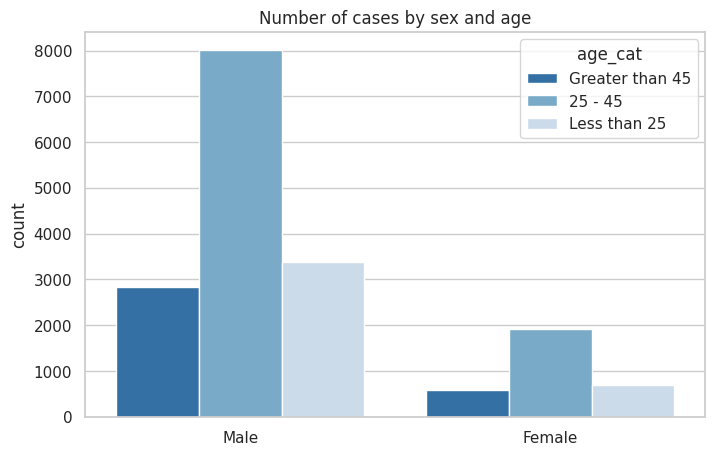

In [209]:
plt.figure(figsize=(8,5))
sns.countplot(data=data2,x="sex",hue="age_cat",palette="Blues_r")
plt.title("Number of cases by sex and age")
plt.xlabel("")
# so only the graphic appears without any text referring to the object type.
plt.show(block=False)

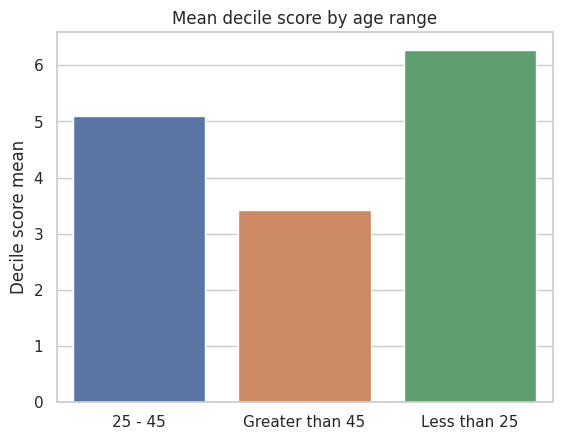

In [210]:
decile_mean_age = data2.groupby("age_cat")["decile_score"].mean().reset_index()
sns.barplot(data=decile_mean_age,x="age_cat",y="decile_score",palette="deep")
plt.ylabel("Decile score mean")
plt.xlabel("")
plt.title("Mean decile score by age range")
# so only the graphic appears without any text referring to the object type.
plt.show(block=False)

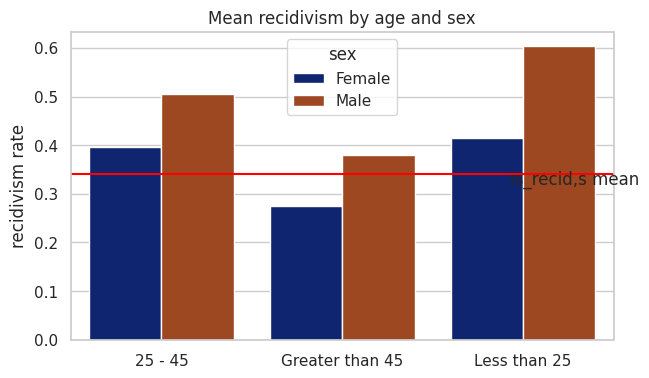

In [211]:
compas2 = data2.groupby(["sex","age_cat"])["is_recid"].mean().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(data=compas2,x="age_cat",y="is_recid",hue="sex",palette="dark")
plt.title("Mean recidivism by age and sex")
plt.xlabel("")
plt.ylabel("recidivism rate")
plt.axhline(y=0.34,color="red")
plt.text(x=1.93,y=0.32,s="is_recid,s mean")
# so only the graphic appears without any text referring to the object type.
plt.show(block=False)

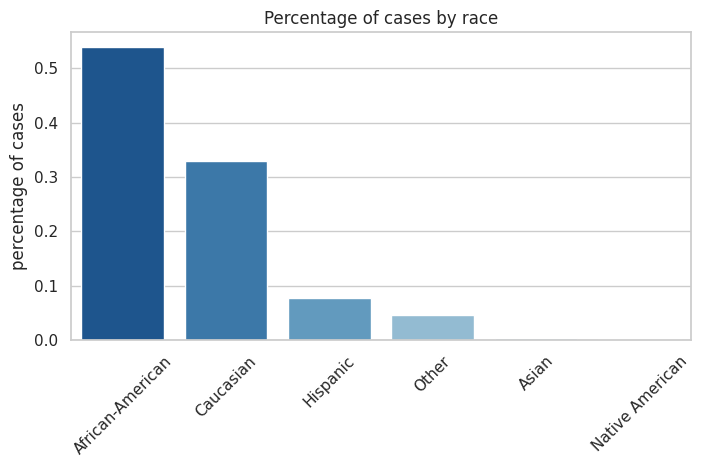

In [212]:
compas3 = data2["race"].value_counts(normalize=True,ascending=False).reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x=compas3["index"],y=compas3["race"],palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("percentage of cases")
plt.title("Percentage of cases by race")
# so only the graphic appears without any text referring to the object type.
plt.show(block=False)

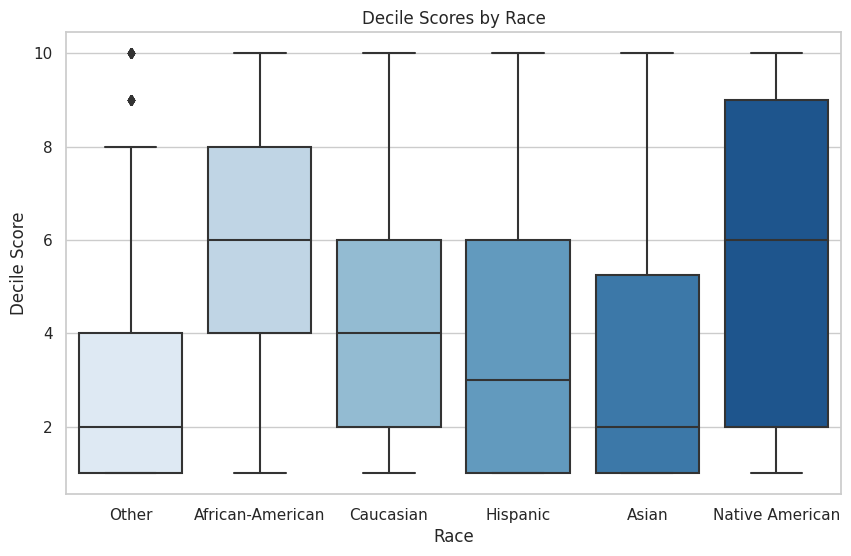

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data2' is your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(data=data2, x="race", y="decile_score", palette="Blues")
plt.title("Decile Scores by Race")
plt.xlabel("Race")
plt.ylabel("Decile Score")
plt.show()


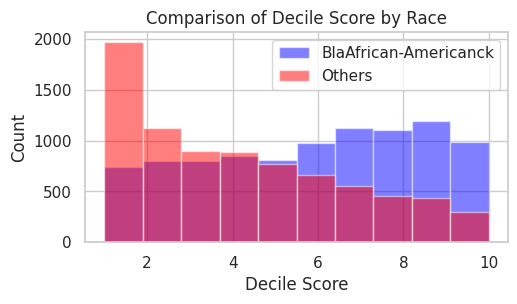

In [214]:
import matplotlib.pyplot as plt

# Create subplots to compare distributions side by side
plt.figure(figsize=(12, 6))

# Histogram for 'decile_score' by race
plt.subplot(2, 2, 2)
plt.hist(data2[data2['race'] == 'African-American']['decile_score'], color='blue', alpha=0.5, label='BlaAfrican-Americanck')
plt.hist(data2[data2['race'] != 'African-American']['decile_score'], color='red', alpha=0.5, label='Others')
plt.title("Comparison of Decile Score by Race")
plt.xlabel("Decile Score")
plt.ylabel("Count")
plt.legend()

# Add more subplots for additional comparisons with different columns

plt.show()


**Exploratory Data Analysis**

**Risk of Recidivism**

In [215]:
# filter dplyr warnings
%load_ext rpy2.ipython
import warnings
warnings.filterwarnings('ignore')

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [216]:
%%R
library(dplyr)
library(ggplot2)
raw_data <- read.csv("/content/drive/MyDrive/Data Mining Project/compas-scores-two-years.csv")
nrow(raw_data)

[1] 7214


In [217]:
%%R
df <- dplyr::select(raw_data, age, c_charge_degree, race, age_cat, score_text, sex, priors_count,
                    days_b_screening_arrest, decile_score, is_recid, two_year_recid, c_jail_in, c_jail_out) %>%
        filter(days_b_screening_arrest <= 30) %>%
        filter(days_b_screening_arrest >= -30) %>%
        filter(is_recid != -1) %>%
        filter(c_charge_degree != "O") %>%
        filter(score_text != 'N/A')
nrow(df)

[1] 6172


In [218]:
%%R
df$length_of_stay <- as.numeric(as.Date(df$c_jail_out) - as.Date(df$c_jail_in))
cor(df$length_of_stay, df$decile_score)

[1] 0.2073297


In [219]:
%%R
summary(df$age_cat)

   Length     Class      Mode 
     6172 character character 


In [220]:
%%R
summary(df$race)

   Length     Class      Mode 
     6172 character character 


In [221]:
print("Black defendants: %.2f%%" %            (3175 / 6172 * 100))
print("White defendants: %.2f%%" %            (2103 / 6172 * 100))
print("Hispanic defendants: %.2f%%" %         (509  / 6172 * 100))
print("Asian defendants: %.2f%%" %            (31   / 6172 * 100))
print("Native American defendants: %.2f%%" %  (11   / 6172 * 100))

Black defendants: 51.44%
White defendants: 34.07%
Hispanic defendants: 8.25%
Asian defendants: 0.50%
Native American defendants: 0.18%


In [222]:
%%R
summary(df$score_text)

   Length     Class      Mode 
     6172 character character 


In [223]:
%%R
xtabs(~ sex + race, data=df)

        race
sex      African-American Asian Caucasian Hispanic Native American Other
  Female              549     2       482       82               2    58
  Male               2626    29      1621      427               9   285


In [224]:
%%R
summary(df$sex)

   Length     Class      Mode 
     6172 character character 


In [225]:
%%R
install.packages("gridExtra", repos="https://cran.r-project.org")


(as ‘lib’ is unspecified)







	‘/tmp/Rtmp4ENpWw/downloaded_packages’



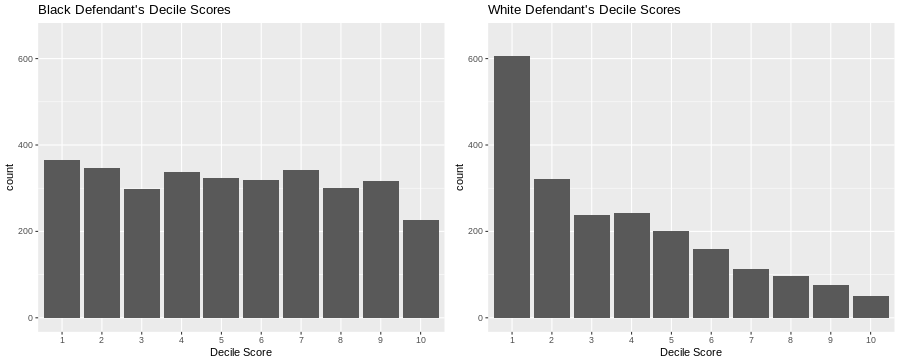

In [226]:
%%R -w 900 -h 363 -u px
library(grid)
library(gridExtra)
pblack <- ggplot(data=filter(df, race =="African-American"), aes(ordered(decile_score))) +
          geom_bar() + xlab("Decile Score") +
          ylim(0, 650) + ggtitle("Black Defendant's Decile Scores")
pwhite <- ggplot(data=filter(df, race =="Caucasian"), aes(ordered(decile_score))) +
          geom_bar() + xlab("Decile Score") +
          ylim(0, 650) + ggtitle("White Defendant's Decile Scores")
grid.arrange(pblack, pwhite,  ncol = 2)

In [227]:
%%R
df <- mutate(df, crime_factor = factor(c_charge_degree)) %>%
      mutate(age_factor = as.factor(age_cat)) %>%
      within(age_factor <- relevel(age_factor, ref = 1)) %>%
      mutate(race_factor = factor(race)) %>%
      within(race_factor <- relevel(race_factor, ref = 3)) %>%
      mutate(gender_factor = factor(sex, labels= c("Female","Male"))) %>%
      within(gender_factor <- relevel(gender_factor, ref = 2)) %>%
      mutate(score_factor = factor(score_text != "Low", labels = c("LowScore","HighScore")))
model <- glm(score_factor ~ gender_factor + age_factor + race_factor +
                            priors_count + crime_factor + two_year_recid, family="binomial", data=df)
summary(model)


Call:
glm(formula = score_factor ~ gender_factor + age_factor + race_factor + 
    priors_count + crime_factor + two_year_recid, family = "binomial", 
    data = df)

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -1.52554    0.07851 -19.430  < 2e-16 ***
gender_factorFemale          0.22127    0.07951   2.783 0.005388 ** 
age_factorGreater than 45   -1.35563    0.09908 -13.682  < 2e-16 ***
age_factorLess than 25       1.30839    0.07593  17.232  < 2e-16 ***
race_factorAfrican-American  0.47721    0.06935   6.881 5.93e-12 ***
race_factorAsian            -0.25441    0.47821  -0.532 0.594717    
race_factorHispanic         -0.42839    0.12813  -3.344 0.000827 ***
race_factorNative American   1.39421    0.76612   1.820 0.068784 .  
race_factorOther            -0.82635    0.16208  -5.098 3.43e-07 ***
priors_count                 0.26895    0.01110  24.221  < 2e-16 ***
crime_factorM               -0.31124    0.06655  -4.677 2.9

In [228]:
%%R
control <- exp(-1.52554) / (1 + exp(-1.52554))
exp(0.47721) / (1 - control + (control * exp(0.47721)))

[1] 1.452841


*Compared to white defendants, black defendants have a 45% higher likelihood of receiving a higher score that accounts for the severity of their offense, prior arrests, and potential future criminal behavior.*

In [229]:
%%R
exp(0.22127) / (1 - control + (control * exp(0.22127)))

[1] 1.194798


*19.4% more women than men are likely to receive a higher grade*

In [230]:
%%R
exp(1.30839) / (1 - control + (control * exp(1.30839)))

[1] 2.49612


*people under 25 are 2.5 times as likely to get a higher score as middle aged defendants.*

**Risk of Violent Recidivism**

In [231]:
%%R
raw_data <- read.csv("/content/drive/MyDrive/Data Mining Project/compas-scores-two-years-violent.csv")
nrow(raw_data)

[1] 4743


In [232]:
%%R
df <- dplyr::select(raw_data, age, c_charge_degree, race, age_cat, v_score_text, sex, priors_count,
                    days_b_screening_arrest, v_decile_score, is_recid, two_year_recid) %>%
        filter(days_b_screening_arrest <= 30) %>%
        filter(days_b_screening_arrest >= -30) %>%
        filter(is_recid != -1) %>%
        filter(c_charge_degree != "O") %>%
        filter(v_score_text != 'N/A')
nrow(df)

[1] 4020


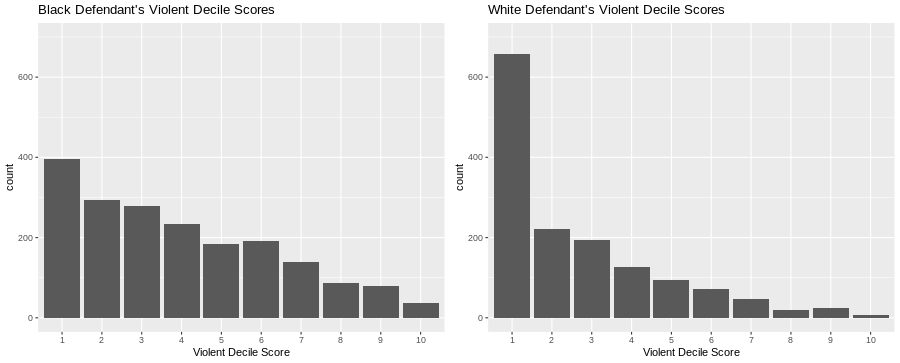

In [233]:
%%R -w 900 -h 363 -u px
library(grid)
library(gridExtra)
pblack <- ggplot(data=filter(df, race =="African-American"), aes(ordered(v_decile_score))) +
          geom_bar() + xlab("Violent Decile Score") +
          ylim(0, 700) + ggtitle("Black Defendant's Violent Decile Scores")
pwhite <- ggplot(data=filter(df, race =="Caucasian"), aes(ordered(v_decile_score))) +
          geom_bar() + xlab("Violent Decile Score") +
          ylim(0, 700) + ggtitle("White Defendant's Violent Decile Scores")
grid.arrange(pblack, pwhite,  ncol = 2)

In [234]:
%%R
df <- mutate(df, crime_factor = factor(c_charge_degree)) %>%
      mutate(age_factor = as.factor(age_cat)) %>%
      within(age_factor <- relevel(age_factor, ref = 1)) %>%
      mutate(race_factor = factor(race,
                                  labels = c("African-American",
                                             "Asian",
                                             "Caucasian",
                                             "Hispanic",
                                             "Native American",
                                             "Other"))) %>%
      within(race_factor <- relevel(race_factor, ref = 3)) %>%
      mutate(gender_factor = factor(sex, labels= c("Female","Male"))) %>%
      within(gender_factor <- relevel(gender_factor, ref = 2)) %>%
      mutate(score_factor = factor(v_score_text != "Low", labels = c("LowScore","HighScore")))
model <- glm(score_factor ~ gender_factor + age_factor + race_factor +
                            priors_count + crime_factor + two_year_recid, family="binomial", data=df)
summary(model)


Call:
glm(formula = score_factor ~ gender_factor + age_factor + race_factor + 
    priors_count + crime_factor + two_year_recid, family = "binomial", 
    data = df)

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -2.24274    0.11326 -19.802  < 2e-16 ***
gender_factorFemale         -0.72890    0.12666  -5.755 8.66e-09 ***
age_factorGreater than 45   -1.74208    0.18415  -9.460  < 2e-16 ***
age_factorLess than 25       3.14591    0.11541  27.259  < 2e-16 ***
race_factorAfrican-American  0.65893    0.10815   6.093 1.11e-09 ***
race_factorAsian            -0.98521    0.70537  -1.397   0.1625    
race_factorHispanic         -0.06416    0.19133  -0.335   0.7374    
race_factorNative American   0.44793    1.03546   0.433   0.6653    
race_factorOther            -0.20543    0.22464  -0.914   0.3605    
priors_count                 0.13764    0.01161  11.854  < 2e-16 ***
crime_factorM               -0.16367    0.09807  -1.669   0

*When compared to white offenders, the violent score overpredicts recidivism for black defendants by 77.3%.*

In [235]:
%%R
control <- exp(-2.24274) / (1 + exp(-2.24274))
exp(0.65893) / (1 - control + (control * exp(0.65893)))

[1] 1.773921


*Defendands under 25 are 7.4 times as likely to get a higher score as middle aged defendants.*

In [239]:
data2.head()

,sex,age,age_cat,race,decile_score,n_punished,c_charge_degree,act(accusation),decile_score_min,risk_score,m_decile_score,m_risk_score,juv_fel_seriousness,is_recid,is_violent_recid
0,Male,69,Greater than 45,Other,1,0,(F3),Aggravated Assault w/Firearm,1,Low,1,Low,0,0,0
1,Male,69,Greater than 45,Other,1,0,(F3),Aggravated Assault w/Firearm,1,Low,1,Low,0,0,0
3,Male,34,25 - 45,African-American,3,0,(F3),Felony Battery w/Prior Convict,3,Low,1,Low,0,1,1
4,Male,24,Less than 25,African-American,4,4,(F3),Possession of Cocaine,4,Low,3,Low,0,1,0
5,Male,24,Less than 25,African-American,4,4,(F3),Possession of Cocaine,4,Low,3,Low,0,1,0


In [246]:
data2.drop(columns=['c_charge_degree'],inplace=True)

**Final Data Preprocessing**

In [247]:
data2.head()

,sex,age,age_cat,race,decile_score,n_punished,act(accusation),decile_score_min,risk_score,m_decile_score,m_risk_score,juv_fel_seriousness,is_recid,is_violent_recid
0,1,69,3,4,1,0,20,1,1,1,1,0,0,0
1,1,69,3,4,1,0,20,1,1,1,1,0,0,0
3,1,34,2,1,3,0,200,3,1,1,1,0,1,1
4,1,24,Less than 25,1,4,4,369,4,1,3,1,0,1,0
5,1,24,Less than 25,1,4,4,369,4,1,3,1,0,1,0


In [248]:
data2['sex'] = data2['sex'].replace({'Male': 1, 'Female': 0})

In [249]:
data2['age_cat'] = data2['age_cat'].replace({'Less than 25': 1,'25 - 45': 2,'Greater than 45': 3})

In [250]:
data2['race'] = data2['race'].replace({'African-American':1,'Caucasian':2,'Hispanic':3,'Other':4,'Asian':5,'Native American':6})

In [251]:
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named 'data2'
label_encoder = LabelEncoder()
data2["act(accusation)"] = label_encoder.fit_transform(data2["act(accusation)"])
data2["risk_score"] = label_encoder.fit_transform(data2["risk_score"])
data2["m_risk_score"] = label_encoder.fit_transform(data2["m_risk_score"])

In [252]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17418 entries, 0 to 18315
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   sex                  17418 non-null  int64
 1   age                  17418 non-null  int64
 2   age_cat              17418 non-null  int64
 3   race                 17418 non-null  int64
 4   decile_score         17418 non-null  int64
 5   n_punished           17418 non-null  int64
 6   act(accusation)      17418 non-null  int64
 7   decile_score_min     17418 non-null  int64
 8   risk_score           17418 non-null  int64
 9   m_decile_score       17418 non-null  int64
 10  m_risk_score         17418 non-null  int64
 11  juv_fel_seriousness  17418 non-null  int64
 12  is_recid             17418 non-null  int64
 13  is_violent_recid     17418 non-null  int64
dtypes: int64(14)
memory usage: 2.0 MB


**Model Implementation**

**K Nearest Neighbors**

In [253]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
label_encoder = LabelEncoder()
data2['sex'] = label_encoder.fit_transform(data2['sex'])
data2['age_cat'] = label_encoder.fit_transform(data2['age_cat'])
data2['race'] = label_encoder.fit_transform(data2['race'])
data2['act(accusation)'] = label_encoder.fit_transform(data2['act(accusation)'])

# Perform feature scaling on numeric features
# scaler = StandardScaler()
# numeric_features = ['n_punished', 'juv_fel_seriousness', 'decile_score', 'decile_score_min']
# data2[numeric_features] = scaler.fit_transform(data2[numeric_features])

# Split the data into train and test sets
X = data2.drop(['is_recid', 'is_violent_recid'], axis=1)
y = data2[['is_recid', 'is_violent_recid']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = 73
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.61


**Decision Tree**

In [259]:
#model implementaion of decision tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.82
